In [ ]:
%pip install os
%pip install glob
%pip install numpy
%pip install cv2
%pip install time
%pip install opencv-python opencv-python-headless
%pip install Pillow
%pip install tensorflow
%pip install keras
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install imageio
%pip install git+https://github.com/tensorflow/docs

In [2]:
from math import log,ceil
import tensorflow as tf 
import os
import numpy as np
from PIL import Image
import threading
from tensorflow import keras
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,LeakyReLU, MaxPooling2D, BatchNormalization, Dropout, Dense,Conv2DTranspose, Flatten, Reshape, AveragePooling2D
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import pandas as pd
from keras.callbacks import TensorBoard


In [3]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
# Function to recursively find .asm files in a directory
def find_asm_files(directory):
    asm_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".bytes"):
                asm_files.append(os.path.join(root, file))
    return asm_files
asm_files = find_asm_files('./')

# SAVE IMAGE FUNCTION

In [4]:
#=================================================================================
def saveimg(array,name):
    print(name)
    print(array.shape)
    if array.shape[1]!=16:
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    print(a,b,array.shape)
    array=array[:int(a*b/16),:]

    array=np.reshape(array,(a,b))
     
    im = Image.fromarray(np.uint8(array))
    im.save("F:/trainImagesBW/" + name[:-6]+'.png', "PNG")

In [8]:
from PIL import Image

def crop_image(input_path, output_path):
    # Open the image file
    original_image = Image.open(input_path)

    # Get the dimensions of the original image
    width, height = original_image.size

    # Set the coordinates to crop the image to 512x512
    left = (width - 512) / 2
    top = (height - 512) / 2
    right = (width + 512) / 2
    bottom = (height + 512) / 2

    # Crop the image
    cropped_image = original_image.crop((left, top, right, bottom))

    # Save the cropped image
    cropped_image.save(output_path)

# Example usage
input_image_path = "../Dynamic-Malware-Detection-using-Generative-AI/GANBang/Colored_2DBKbxPnVCyiLzqAHU.png"
output_image_path = "./cropped_image.jpg"

crop_image(input_image_path, output_image_path)


# GRAY-SCALE IMAGE GENERATOR

In [7]:
asm_files = find_asm_files('./')

def process_file(x):
    
    f=open(x)
    x = x[9:]
    array=[]
    for line in f:
        xx=line.split()
        if len(xx)!=17:
            continue
        array.append([int(i,16) if i!='??' else 0 for i in xx[1:]])
    saveimg(np.array(array),x)
    del array
    f.close() 
    
def process_files_in_thread(asm_files):
    for file_path in asm_files:
        if not os.path.exists("F:/trainImagesBW/" + file_path[9:-6]+'.png'):
            print(f"Processing file {file_path[9:-6]}.png")
            process_file(file_path)
        else:
            print(f"The file {file_path} already exists in the target directory. Skipping...")


asm_files = find_asm_files('../train/')

num_threads = 8
chunk_size = len(asm_files) // num_threads
file_chunks = [asm_files[i:i+chunk_size] for i in range(0, len(asm_files), chunk_size)]

threads = []

for chunk in file_chunks:
    thread = threading.Thread(target=process_files_in_thread, args=(chunk,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

The file ../train/01azqd4InC7m9JpocGv5.bytes already exists in the target directory. Skipping...
The file ../train/3yB5s1ZCvPmpgernQFKw.bytes already exists in the target directory. Skipping...
The file ../train/01IsoiSMh5gxyDYTl4CB.bytes already exists in the target directory. Skipping...
The file ../train/3YCBS2N5ypQ94Um1Mhdt.bytes already exists in the target directory. Skipping...
The file ../train/01jsnpXSAlgw6aPeDxrU.bytes already exists in the target directory. Skipping...
The file ../train/3yHaDhqlkp67fzMQAgxc.bytes already exists in the target directory. Skipping...
The file ../train/01kcPWA9K2BOxQeS5Rju.bytes already exists in the target directory. Skipping...
The file ../train/3yitlJFLwPhTcNbUA2aS.bytes already exists in the target directory. Skipping...
The file ../train/01SuzwMJEIXsK7A8dQbl.bytes already exists in the target directory. Skipping...
The file ../train/3ym0zqOn8cWVLhx4ZGvJ.bytes already exists in the target directory. Skipping...
The file ../train/02IOCvYEy8mj

In [4]:
def find_png_files(directory):
    png_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            png_files.append(os.path.join(root, file))
    return png_files

# Generate Resized Images of Size 128 x 128

In [ ]:
def process_file(file_path):
    image = Image.open(file_path)

    target_width = 128
    target_height = 128
    image = cv2.imread(file_path)
    res = cv2.resize(image, (target_width,target_height))
    # resized_image = image.resize((target_width, target_height))
    print(file_path)
    i = file_path[17:len(file_path)-4]
    cv2.imwrite("F:/malware-classification/TrainImagesBWResized128/" + i + ".png", res)
    # res.save("F:/malware-classification/TrainImagesColorResized128/" + i + ".png")


def process_files_in_thread(asm_files):
    for file_path in asm_files:
        process_file(file_path)

# asm_files = find_asm_files('./train')
png_files = find_png_files("../TrainImagesBW/")
num_threads = 8
chunk_size = len(png_files) // num_threads
file_chunks = [png_files[i:i+chunk_size] for i in range(0, len(png_files), chunk_size)]

threads = []

for chunk in file_chunks:
    thread = threading.Thread(target=process_files_in_thread, args=(chunk,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

In [ ]:
def spatial_pooling(image, pool_size):

    height, width = image.shape

    # Calculate the new dimensions after pooling
    new_height = height // 2
    new_width = width // 2
    # Initialize an array to store the pooled image
    pooled_image = np.zeros((new_height, new_width))
    
    # Apply spatial pooling
    for i in range(0, new_height):
        for j in range(0, new_width):
            # Calculate the region for pooling
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            # Take the maximum value within the region
            pooled_image[i, j] = np.max(region)
    
    return pooled_image

image = cv2.imread("./GANBang/Colored_2DBKbxPnVCyiLzqAHU.png", cv2.IMREAD_GRAYSCALE)

pool_size = 2

pooled_image = spatial_pooling(image, pool_size)

plt.imshow(image)
plt.show()
plt.imshow(pooled_image)
plt.title('Pooled Image')
plt.show()

# Images loaded to RAM for model

In [12]:
TRAIN_LABELS = pd.read_csv("../trainLabels.csv")
TRAIN_LABELS["ID"] = TRAIN_LABELS["ID"].astype(str)
TRAIN_LABELS["Class"] = TRAIN_LABELS["Class"].astype(int)
print(TRAIN_LABELS.head())


                     ID  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1


In [13]:
TRAIN_LABELS.plot(kind='bar', x='ID', y='Class', color='blue', legend=False)

# Adding labels and title
plt.xlabel('Class Labels')
plt.ylabel('Class Counts')
plt.title('Distribution of Classes')

# Show the plot
plt.show()

KeyboardInterrupt: 

VGG16 AUTOENCODER
https://github.com/tykiww/VGG16_AE/tree/master

In [ ]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dense
from keras.models import Model
from keras.metrics import MeanSquaredError


def ssim_loss(y_true, y_pred):
    print(y_true)
    print(y_pred)
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1))



def makeAutoEncoder():
    
    inp = Input(shape = (128,128,3))
    #inp_rgb = Conv2D(3, (1, 1), padding='same')(inp)
    
    encoder = VGG16(weights = 'imagenet',include_top = False)(inp)
    
    ###########latent#######
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same',name='latent')(encoder)
    x = UpSampling2D((2,2))(x)
    
    
    ################### decoder ###################
        
  # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)     
        
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)        
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
    autoencoder = Model(inputs=inp, outputs=decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=[MeanSquaredError()])

    return autoencoder


autoencoder = makeAutoEncoder()

autoencoder.summary()

In [17]:
# ... (Your existing code)

# Define a custom callback for TensorBoard to log generated images
class ImageCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Select a random sample of images from the test set
        sample_images = np.array(images[:10])  # Adjust the number of images to display as needed

        # Generate reconstructed images using the autoencoder
        reconstructed_images = autoencoder.predict(sample_images)

        # Rescale pixel values to the range [0, 1] for visualization
        sample_images = (sample_images - sample_images.min()) / (sample_images.max() - sample_images.min())
        reconstructed_images = (reconstructed_images - reconstructed_images.min()) / (reconstructed_images.max() - reconstructed_images.min())

        # Concatenate original and reconstructed images horizontally
        display_images = np.concatenate([sample_images, reconstructed_images], axis=2)

        # Log the images using TensorBoard Image callback
        file_writer_images = tf.summary.create_file_writer('./logs' + '/images')
        with file_writer_images.as_default():
            tf.summary.image("Generated_Images", display_images, step=epoch)

# ... (Your existing code)


In [18]:
tensorboard = TensorBoard(log_dir="logs", histogram_freq=0, write_graph=True, write_images=True)
def load_images_from_directory(directory_path ):
    imagePaths = []
    labels = []
    i=0
    for root, dirs, files in os.walk(directory_path):
        sum = 0
        for file in files:
            if sum == 500:
                print("Fitting Batch " + str(i) + " --> " + str(i + 500))
                i += 500
                
                tensor_rank = tf.rank(images[0])
                # Print the result
                print("Rank of the tensor:", tensor_rank.numpy())
                autoencoder.fit(np.array(images), np.array(images), epochs=20, batch_size=32, verbose=1, callbacks=[tensorboard, ImageCallback()])
                # del images
                # images = []
                del labels
                labels = []         
                sum = 0
                break
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                imagePaths.append(image_path[27:len(image_path) - 4])
                imageName = image_path[27:len(image_path) - 4]
                result = TRAIN_LABELS[TRAIN_LABELS["ID"] == imageName]
                class_value = result["Class"].iloc[0]
                labels.append(class_value)
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = image / 255.0  # Normalize pixel values
                images.append(image)
                sum += 1
    
    return images,imagePaths

result = load_images_from_directory("../TrainImagesBWResized128/")

Fitting Batch 0 --> 500
Rank of the tensor: 3
Epoch 1/20
47/47 [==============================] - 70s 1s/step - loss: 0.5655 - mean_squared_error: 0.0530
Epoch 2/20
47/47 [==============================] - 48s 1s/step - loss: 0.5533 - mean_squared_error: 0.0498
Epoch 3/20
47/47 [==============================] - 36s 767ms/step - loss: 0.5421 - mean_squared_error: 0.0471
Epoch 4/20
47/47 [==============================] - 55s 1s/step - loss: 0.5364 - mean_squared_error: 0.0462
Epoch 5/20
47/47 [==============================] - 54s 1s/step - loss: 0.5308 - mean_squared_error: 0.0449
Epoch 6/20
47/47 [==============================] - 54s 1s/step - loss: 0.5280 - mean_squared_error: 0.0443
Epoch 7/20
47/47 [==============================] - 12s 240ms/step - loss: 0.5219 - mean_squared_error: 0.0423
Epoch 8/20
47/47 [==============================] - 11s 239ms/step - loss: 0.5200 - mean_squared_error: 0.0419
Epoch 9/20
47/47 [==============================] - 15s 321ms/step - loss: 0.5164

In [27]:
df = pd.read_csv('../Analysis-Kaggle-Work/trainLabels.csv')
labelsDictionary = df.set_index('ID')['Class'].to_dict()

In [26]:
trainingSet = result[0]
trainingSet = np.array(trainingSet)
trainingLabels = [labelsDictionary[result[1][i]] for i in range(len(result[1]))]
trainingLabels = np.array(trainingLabels)

NameError: name 'result' is not defined

# Models


# Problems while using pooling techniques

In [19]:
def max_pooling(image, pool_size):
    pooled_image = np.zeros((image.shape[0]//pool_size[0], image.shape[1]//pool_size[1], image.shape[2]), dtype=np.uint8)
    for i in range(pooled_image.shape[0]):
        for j in range(pooled_image.shape[1]):
            for k in range(pooled_image.shape[2]):
                pooled_image[i, j, k] = np.max(image[i*pool_size[0]:(i+1)*pool_size[0], j*pool_size[1]:(j+1)*pool_size[1], k])
    return pooled_image

imagesPicked = find_png_files("./GANBang/")
for images in imagesPicked:
    image_path = images 
    image = cv2.imread(image_path)
    height, width, channels = image.shape
    targetPoolingHeight = ceil(height / 128)
    targetPoolWidth = ceil(width/128)
    pooling_size = (targetPoolingHeight, targetPoolWidth)
    pooling_result = max_pooling(image, pooling_size)
    plt.title("Original Image")
    plt.imshow(image)
    plt.show()
    plt.title("Pooled Image")
    plt.imshow(pooling_result)
    plt.show()




NameError: name 'find_png_files' is not defined

# MAYBE THIS IS IT

In [21]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [97]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(type(train_images))
print(train_images.shape)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

<class 'numpy.ndarray'>
(60000, 28, 28)


In [6]:
def loadTrainAndImageLabels(count, directoryPath):
    trainImages = []
    imagePaths = []
    trainImageLabels = []
    for root, dirs, files in os.walk(directoryPath):
        for file in files:
            if count == 0:
                return trainImages, imagePaths, trainImageLabels
            imagePath = os.path.join(root, file)
            imagePaths.append(imagePath[27:len(imagePath) - 4])
            imageName = imagePath[27:len(imagePath) - 4]
            result = TRAIN_LABELS[TRAIN_LABELS["ID"] == imageName]
            classValue = result["Class"].iloc[0]
            trainImageLabels.append(classValue)
            image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
            trainImages.append(image)
            count -= 1

images, paths, labels = loadTrainAndImageLabels(11848, "../TrainImagesBWResized256/")
print(labels)
images = np.array(images)
print(images.shape)
train_images = images.astype('float32')
# train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

[10, 10, 10, 10, 10, 10, 9, 2, 9, 1, 8, 10, 10, 10, 6, 2, 2, 6, 2, 2, 10, 6, 10, 10, 10, 3, 10, 3, 1, 10, 8, 9, 3, 3, 10, 10, 10, 2, 10, 1, 2, 2, 6, 1, 2, 10, 2, 3, 3, 3, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 2, 3, 10, 10, 10, 10, 6, 3, 6, 7, 6, 10, 2, 10, 10, 7, 8, 2, 8, 1, 2, 3, 3, 9, 8, 8, 1, 9, 7, 10, 10, 10, 2, 10, 8, 7, 9, 3, 3, 2, 8, 6, 10, 8, 10, 10, 3, 3, 3, 3, 1, 9, 9, 6, 3, 8, 3, 9, 10, 10, 3, 3, 9, 10, 2, 6, 10, 9, 3, 3, 2, 2, 1, 1, 2, 3, 10, 10, 10, 2, 1, 6, 7, 3, 3, 2, 10, 10, 3, 10, 10, 3, 8, 1, 2, 9, 3, 2, 3, 2, 1, 2, 2, 9, 2, 2, 8, 1, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 9, 2, 8, 1, 8, 2, 2, 3, 2, 8, 2, 2, 2, 1, 8, 3, 7, 3, 3, 2, 1, 3, 2, 1, 3, 9, 3, 1, 2, 3, 8, 8, 3, 3, 6, 3, 8, 3, 9, 3, 3, 2, 2, 1, 8, 6, 2, 3, 3, 3, 7, 1, 2, 3, 6, 3, 2, 1, 7, 2, 2, 3, 7, 3, 3, 3, 3, 8, 3, 6, 1, 3, 2, 3, 3, 2, 1, 3, 9, 2, 6, 8, 1, 9, 1, 2, 3, 3, 2, 2, 3, 3, 3, 9, 7, 8, 3, 2, 9, 2, 1, 3, 9, 8, 6, 3, 2, 3, 9, 5, 8, 3, 3, 4, 1, 3, 3, 9, 9, 8, 3, 3, 1, 3, 8, 1, 2, 8, 3, 2, 1, 8, 3, 2,

In [115]:
trainImages, testImages, trainPaths, testPaths, trainLabels, testLabels = train_test_split(
    train_images, paths, labels, test_size=0.2, random_state=42
)

In [116]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [117]:
trainDataset = tf.data.Dataset.from_tensor_slices(trainImages).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [137]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # assert model.output_shape == (None, 128, 128, 1)

    return model

(1, 28, 28, 1)


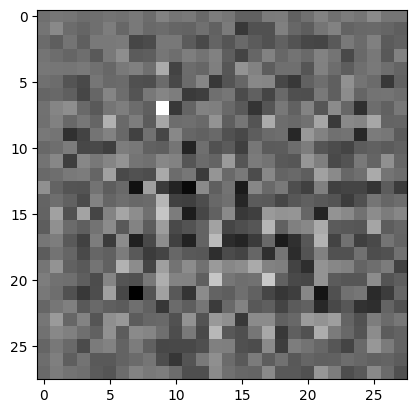

In [139]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(generated_image.shape)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [123]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [124]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00345665]], shape=(1, 1), dtype=float32)


In [125]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [126]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [127]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [128]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [129]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [130]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [131]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [132]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [133]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [134]:
train(trainDataset, EPOCHS)

ValueError: in user code:

    File "C:\Users\20K-0208\AppData\Local\Temp\ipykernel_20372\3248131820.py", line 10, in train_step  *
        real_output = discriminator(images, training=True)
    File "c:\Users\20K-0208\.conda\envs\malwareCuda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\20K-0208\.conda\envs\malwareCuda\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(120, 128, 128)


In [84]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

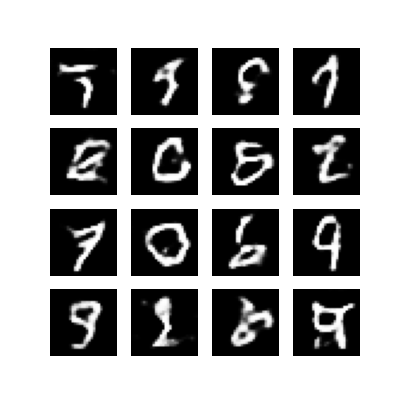

In [85]:
display_image(EPOCHS)

In [94]:
import glob
from pathlib import Path
import imageio

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = sorted(Path('.').glob('image*.png'))
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Display a message indicating the GIF creation
print(f'Animation saved as {anim_file}')


C:\Users\20K-0208\AppData\Local\Temp\ipykernel_20372\318709914.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Animation saved as dcgan.gif


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = 'C:/Users/mrafi/Downloads/malware-classification-CNN-main/malware-classification-CNN-main/benign_data\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Replace the substring in the specified column
column_name = 'img_code'
substring_to_remove = './benign_data/benign_imgs/'
df[column_name] = df[column_name].str.replace(substring_to_remove, '')

# Write the updated DataFrame back to the CSV file
df.to_csv(file_path, index=False)


In [8]:
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image

# Example image_data (replace this with your actual image data)
image_data = train_images

# Convert grayscale images to simulate RGB images
image_data_rgb = np.stack((image_data,) * 3, axis=-1)

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Function to extract features using ResNet50
def extract_resnet_features(img_array):
    img_array = preprocess_input(img_array)
    features = base_model.predict(np.expand_dims(img_array, axis=0))
    features_flattened = features.flatten()
    return features_flattened

# Extract features for each image
features = [extract_resnet_features(img_array) for img_array in image_data_rgb]

# Convert the list of features to a NumPy array
features_array = np.array(features)

# Apply k-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_array)

# Print or use the resulting cluster labels
print("Cluster Labels:", cluster_labels)





1/1 [==============================] - 0s 133ms/step
Cluster Labels: [7 7 7 ... 8 8 5]


In [9]:
cluster_dict = {cluster_label: [] for cluster_label in range(n_clusters)}

for i, cluster_label in enumerate(cluster_labels):
    cluster_dict[cluster_label].append(paths[i])

# Print or inspect the results
for cluster_label, images_in_cluster in cluster_dict.items():
    print(f"Cluster {cluster_label}: {len(images_in_cluster)} images")
    print(images_in_cluster)
    print("\n")

Cluster 0: 1565 images
['01a38ae91ae28ca9dcc89790292ad106a3f5bf8c16318b7ac9c1e7ab4ca628d4', '01azqd4InC7m9JpocGv5', '01jsnpXSAlgw6aPeDxrU', '02mlBLHZTDFXGa7Nt6cr', '03nJaQV6K2ObICUmyWoR', '04mcPSei852tgIKUwTJr', '05LHG8fR3iPn6agIo9z7', '06QinlpeFIWj8qHc7Vys', '0704b67194c1ac90f93c62cd00d1742dfb0069dfc837657e29c63884a989fbb4', '07ECKjDTyQLnabNoxrIH', '09CPNMYyQjSguFrE8UOf', '0AV6MPlrTWG4fYI7NBtQ', '0B2RwKm6dq9fjUWDNIOa', '0bjN3Kgw5OATSreRmEdi', '0BZQIJak6Pu2tyAXfrzR', '0c9baed0badb2431a9b173609d3990ccbba7cba4455ba0e8ebe6267d8b4ae3ef', '0CPaAXtyswrBq83D6VEg', '0Cq4wfhLrKBJiut1lYAZ', '0EL7OGZKozbiNCVP61gk', '0fe87602f6f2a6dd5acf209eea81ec0555fe1e02d6f781299724238b4cb2e2c1', '0FKerJl18xOc3jdoyg4A', '0gcZkSFr7VnEmLPbTxUe', '0gDsIvrylX5fPbG7cSBn', '0gWUIudhwovMYb3NSnZA', '0gxJ1YmwFUvnOzoM8N53', '0HICT7RtjaVQzcNOeMgS', '0Hrfce4X5YGESJPjl9uL', '0IelgX5H2s14KutkEyNU', '0jkmvR43UQ9yKxqXei61', '0JnvoeflBWwIcQa5GEPK', '0MmZ8j5pn2R3VG9wlxYi', '0Phtp2LVcsCFMKkGgmRH', '0QIZ6hemJLErWdFlGnCc', '0qV43bn

In [16]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
actual_labels = TRAIN_LABELS['Class'].values  # Replace 'actual_labels' with your actual column name

# Adjusted Rand Index measures the similarity between true labels and predicted labels
ari_score = adjusted_rand_score(actual_labels, cluster_labels)
print(f"Adjusted Rand Index: {ari_score}")

# Confusion Matrix to see how true classes are distributed across clusters
conf_matrix = confusion_matrix(actual_labels, cluster_labels)
print("Confusion Matrix:")
print(conf_matrix)

Adjusted Rand Index: 0.006167895393309503
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0]
 [201 320 163  90  45 165 110 361  48  38   0]
 [329 486 265 136  79 244 184 582 104  69   0]
 [388 620 311 195  93 367 232 515 139  82   0]
 [ 58 101  56  27  21  58  31  97  16  10   0]
 [  4   9   5   3   0   3   4  11   2   1   0]
 [ 94 139  90  53  34  93  70 119  38  21   0]
 [ 57  72  53  35  22  53  37  35  26   8   0]
 [155 284 159  90  40 163 105 127  70  35   0]
 [133 240 113  74  45 137  86 110  53  22   0]
 [146 152 143  59  45 132  74 123  88  18   0]]


In [17]:
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image

# Example image_data (replace this with your actual image data)
image_data = train_images

# Convert grayscale images to simulate RGB images
image_data_rgb = np.stack((image_data,) * 3, axis=-1)

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Function to extract features using ResNet50
def extract_resnet_features(img_array):
    img_array = preprocess_input(img_array)
    features = base_model.predict(np.expand_dims(img_array, axis=0))
    features_flattened = features.flatten()
    return features_flattened

# Extract features for each image
features = [extract_resnet_features(img_array) for img_array in image_data_rgb]

# Convert the list of features to a NumPy array
features_array = np.array(features)

# Apply k-means clustering
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_array)

# Print or use the resulting cluster labels
print("Cluster Labels:", cluster_labels)



1/1 [==============================] - 0s 150ms/step
Cluster Labels: [7 7 7 ... 6 6 5]


In [18]:
cluster_dict = {cluster_label: [] for cluster_label in range(n_clusters)}

for i, cluster_label in enumerate(cluster_labels):
    cluster_dict[cluster_label].append(paths[i])

# Print or inspect the results
for cluster_label, images_in_cluster in cluster_dict.items():
    print(f"Cluster {cluster_label}: {len(images_in_cluster)} images")
    print(images_in_cluster)
    print("\n")

Cluster 0: 1567 images
['01a38ae91ae28ca9dcc89790292ad106a3f5bf8c16318b7ac9c1e7ab4ca628d4', '01azqd4InC7m9JpocGv5', '01jsnpXSAlgw6aPeDxrU', '02mlBLHZTDFXGa7Nt6cr', '03nJaQV6K2ObICUmyWoR', '04mcPSei852tgIKUwTJr', '05LHG8fR3iPn6agIo9z7', '06QinlpeFIWj8qHc7Vys', '0704b67194c1ac90f93c62cd00d1742dfb0069dfc837657e29c63884a989fbb4', '07ECKjDTyQLnabNoxrIH', '09CPNMYyQjSguFrE8UOf', '0AV6MPlrTWG4fYI7NBtQ', '0B2RwKm6dq9fjUWDNIOa', '0bjN3Kgw5OATSreRmEdi', '0BZQIJak6Pu2tyAXfrzR', '0c9baed0badb2431a9b173609d3990ccbba7cba4455ba0e8ebe6267d8b4ae3ef', '0CPaAXtyswrBq83D6VEg', '0Cq4wfhLrKBJiut1lYAZ', '0EL7OGZKozbiNCVP61gk', '0fe87602f6f2a6dd5acf209eea81ec0555fe1e02d6f781299724238b4cb2e2c1', '0FKerJl18xOc3jdoyg4A', '0gcZkSFr7VnEmLPbTxUe', '0gDsIvrylX5fPbG7cSBn', '0gWUIudhwovMYb3NSnZA', '0gxJ1YmwFUvnOzoM8N53', '0HICT7RtjaVQzcNOeMgS', '0Hrfce4X5YGESJPjl9uL', '0IelgX5H2s14KutkEyNU', '0jkmvR43UQ9yKxqXei61', '0JnvoeflBWwIcQa5GEPK', '0MmZ8j5pn2R3VG9wlxYi', '0Phtp2LVcsCFMKkGgmRH', '0QIZ6hemJLErWdFlGnCc', '0qV43bn

In [19]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
actual_labels = TRAIN_LABELS['Class'].values  # Replace 'actual_labels' with your actual column name

# Adjusted Rand Index measures the similarity between true labels and predicted labels
ari_score = adjusted_rand_score(actual_labels, cluster_labels)
print(f"Adjusted Rand Index: {ari_score}")

# Confusion Matrix to see how true classes are distributed across clusters
conf_matrix = confusion_matrix(actual_labels, cluster_labels)
print("Confusion Matrix:")
print(conf_matrix)

Adjusted Rand Index: 0.005234731742082588
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0]
 [201 334 163  90  49 165 148 353  38   0   0]
 [328 518 264 136  86 244 262 571  69   0   0]
 [393 652 311 195 105 367 331 506  82   0   0]
 [ 57 104  56  27  21  58  46  96  10   0   0]
 [  4  10   5   3   0   3   4  12   1   0   0]
 [ 94 145  90  53  36  92 106 114  21   0   0]
 [ 57  79  53  35  23  53  56  34   8   0   0]
 [155 299 159  90  40 164 169 117  35   0   0]
 [132 254 113  74  46 137 128 107  22   0   0]
 [146 175 140  59  51 133 138 120  18   0   0]]


In [20]:
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image

# Example image_data (replace this with your actual image data)
image_data = train_images

# Convert grayscale images to simulate RGB images
image_data_rgb = np.stack((image_data,) * 3, axis=-1)

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Function to extract features using ResNet50
def extract_resnet_features(img_array):
    img_array = preprocess_input(img_array)
    features = base_model.predict(np.expand_dims(img_array, axis=0))
    features_flattened = features.flatten()
    return features_flattened

# Extract features for each image
features = [extract_resnet_features(img_array) for img_array in image_data_rgb]

# Convert the list of features to a NumPy array
features_array = np.array(features)

# Apply k-means clustering
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_array)

# Print or use the resulting cluster labels
print("Cluster Labels:", cluster_labels)



1/1 [==============================] - 0s 104ms/step
Cluster Labels: [7 7 7 ... 8 8 5]


In [21]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
actual_labels = TRAIN_LABELS['Class'].values  # Replace 'actual_labels' with your actual column name

# Adjusted Rand Index measures the similarity between true labels and predicted labels
ari_score = adjusted_rand_score(actual_labels, cluster_labels)
print(f"Adjusted Rand Index: {ari_score}")

# Confusion Matrix to see how true classes are distributed across clusters
conf_matrix = confusion_matrix(actual_labels, cluster_labels)
print("Confusion Matrix:")
print(conf_matrix)

Adjusted Rand Index: 0.006675914724937676
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0]
 [202 320 119  90  43 165 110 361  48  38  45]
 [329 486 185 136  80 244 184 582 104  69  79]
 [388 620 225 195  86 367 232 515 139  82  93]
 [ 58 101  38  27  18  58  31  97  16  10  21]
 [  4   9   3   3   2   3   4  11   2   1   0]
 [ 94 139  64  53  26  93  70 119  38  21  34]
 [ 57  72  40  35  12  53  38  34  26   8  23]
 [155 284 117  90  42 163 105 127  70  35  40]
 [133 240  87  74  26 137  86 110  53  22  45]
 [146 152 103  59  39 132  74 123  88  18  46]]


In [31]:
def extract_cluster_features(cluster_label, features_array):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    cluster_features = features_array[cluster_indices]
    # Use a statistical measure (mean, median, etc.) to obtain representative features
    representative_features = np.mean(cluster_features, axis=0)
    return representative_features

# Example: Use representative features as noise vector for generator
for cluster_label in range(n_clusters):
    cluster_features = extract_cluster_features(cluster_label, features_array)
    # Pass cluster_features as the noise vector to your generator
    print(cluster_features)
    print(cluster_features.shape)
    passtoEncoder(cluster_features)

    # Use the generated_image as needed

[0.03487294 0.0649164  0.01034248 ... 0.01161185 0.00259309 0.3509158 ]
(131072,)

Epoch 1/100

1/1 [==============================] - 1s 580ms/step - loss: 0.0985
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0914
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0851
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0795
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0700
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0658
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0618
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0549
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 12/100
1/1 [==============================] - 0

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def passtoEncoder(featureArray):
    # Assuming 'features' is your 1D feature vector
    features = featureArray  # Replace with your actual 1D feature vector

    # Create an autoencoder model
    input_dim = features.shape[0]
    encoding_dim = 100  # Choose the desired encoding dimension

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Reshape the features for training (required for a 1D input)
    features_reshaped = features.reshape(1, -1)

    # Train the autoencoder
    autoencoder.fit(features_reshaped, features_reshaped, epochs=100, batch_size=1)

    # Obtain the lower-dimensional representation
    encoded_features = autoencoder.predict(features_reshaped)
    print(encoded_features)

# 'encoded_features' can be used as input to your generator
